# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [4]:
#Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
spaceship_titanic_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship_titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


  PassengerId HomePlanet CryoSleep  Cabin  Destination       Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  0.695413  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e -0.336769  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  2.002842   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  0.282540  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e -0.887266  False   

   RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0    -0.345756  -0.285355     -0.309494 -0.273759 -0.269534   
1    -0.176748  -0.279993     -0.266112  0.206165 -0.230494   
2    -0.279083   1.845163     -0.309494  5.596357 -0.226058   
3    -0.345756   0.479034      0.334285  2.636384 -0.098291   
4     0.124056  -0.243650     -0.047470  0.220152 -0.267759   

                Name  Transported  
0    Maham Ofracculy        False  
1       Juanna Vines         True  
2      Altark Susent        False  
3       Solam Susent      

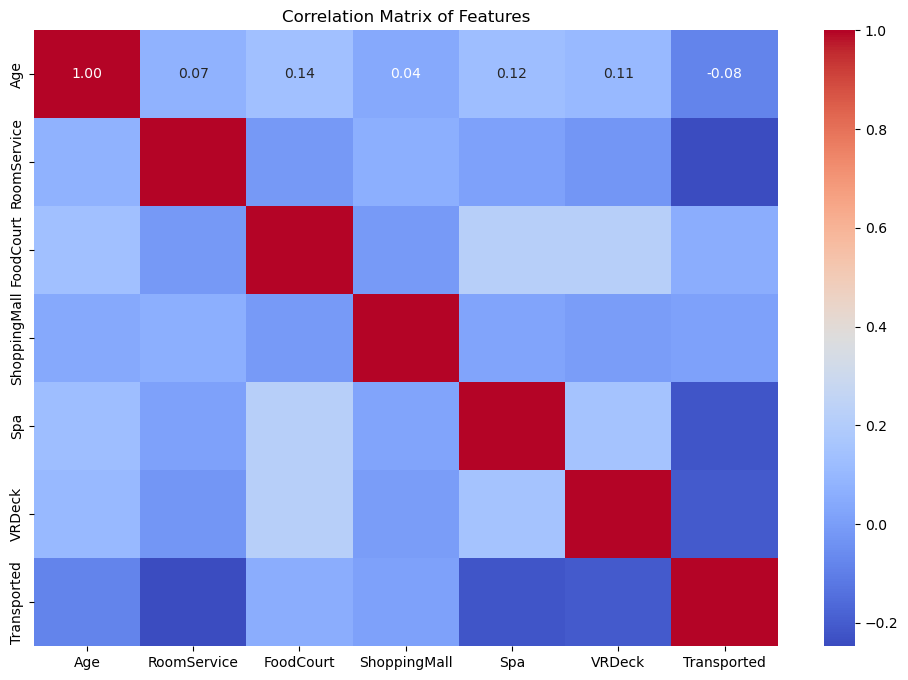

Transported     1.000000
FoodCourt       0.055025
ShoppingMall    0.011602
Age            -0.082553
VRDeck         -0.207950
Spa            -0.219854
RoomService    -0.247291
Name: Transported, dtype: float64
Selected Features: ['FoodCourt', 'ShoppingMall', 'Age']


In [7]:
# Drop rows with null values
spaceship_titanic_df = spaceship_titanic_df.dropna()

# Selecting numeric features for scaling
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Applying standard scaling to numeric features
scaler = StandardScaler()
spaceship_titanic_df[numeric_features] = scaler.fit_transform(spaceship_titanic_df[numeric_features])

# Display the first few rows after scaling
print(spaceship_titanic_df.head())

# Compute the correlation matrix
correlation_matrix = spaceship_titanic_df[numeric_features + ['Transported']].corr()

# Extract the correlation values with the target variable 'Transported'
correlation_with_target = correlation_matrix['Transported'].sort_values(ascending=False)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Display the correlation with the target variable
print(correlation_with_target)

# Feature Selection based on correlation
selected_features = correlation_with_target.index[1:4].tolist()  # Selecting the top 3 features based on absolute correlation
print("Selected Features:", selected_features)

**Perform Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split

# Define feature set and target variable
X = spaceship_titanic_df[numeric_features]
y = spaceship_titanic_df['Transported']

# Define feature set and target variable
X = spaceship_titanic_df[numeric_features]
y = spaceship_titanic_df['Transported']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5284, 6)
X_test shape: (1322, 6)
y_train shape: (5284,)
y_test shape: (1322,)


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the base model
base_model = DecisionTreeClassifier(random_state=42)

# Bagging
bagging_model = BaggingClassifier(base_model, n_estimators=100, bootstrap=True, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

print(f"Bagging Accuracy: {bagging_accuracy:.2f}")

# Pasting
pasting_model = BaggingClassifier(base_model, n_estimators=100, bootstrap=False, random_state=42)
pasting_model.fit(X_train, y_train)
y_pred_pasting = pasting_model.predict(X_test)
pasting_accuracy = accuracy_score(y_test, y_pred_pasting)

print(f"Pasting Accuracy: {pasting_accuracy:.2f}")

Bagging Accuracy: 0.79
Pasting Accuracy: 0.75


- Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.80


- Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Calculate the accuracy
gb_accuracy = accuracy_score(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

Gradient Boosting Accuracy: 0.80


- Adaptive Boosting

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the AdaBoost model
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_boost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=100, random_state=42)
ada_boost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ab = ada_boost_model.predict(X_test)

# Calculate the accuracy
ab_accuracy = accuracy_score(y_test, y_pred_ab)

print(f"AdaBoost Accuracy: {ab_accuracy:.2f}")

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.80


Which model is the best and why?

In [17]:
# Initialize models
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(base_model, n_estimators=100, bootstrap=True, random_state=42)
pasting_model = BaggingClassifier(base_model, n_estimators=100, bootstrap=False, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
ada_boost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=100, random_state=42)

# Train and evaluate models
models = {
    'Bagging': bagging_model,
    'Pasting': pasting_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'AdaBoost': ada_boost_model
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracies[name]:.2f}")

# Find the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

print(f"Best Model: {best_model_name} with accuracy {best_model_accuracy:.2f}")

Bagging Accuracy: 0.79
Pasting Accuracy: 0.75
Random Forest Accuracy: 0.80
Gradient Boosting Accuracy: 0.80


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.80
Best Model: Random Forest with accuracy 0.80
